<a href="https://colab.research.google.com/github/tillaczel/Machine-learning-workshop/blob/resturcture/Q_learning/Q_Learning_tic_tac_toe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tic tac toe with Q learning

This notebook contains an inplementation of the Q learning agorithm aplied to the 3X3 tic tac toe game. I created an environment and an agent object. For the environment object I used the tic tac toe written by Ken W. Alger (https://github.com/kenwalger/Python-Tic-Tac-Toe/blob/master/tic-tac-toe2.py). I expended the tic tac toe implementation with the step function, used for expirience gathering. The agent uses 1 time step bootstrapping and $\epsilon$ greedy strategy.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class environment():

    def __init__(self):
        self.X = "X"
        self.O = "O"
        self.EMPTY = " "
        self.TIE = "TIE"
        self.NUM_SQUARES = 9

        self.computer, self.human = self.pieces()
        self.turn = self.X
        self.board = self.new_board()


    def display_instruct(self):
        """Display game instructions."""
        print(
        """
        Welcome to the greatest intellectual challenge of all time: Tic-Tac-Toe
        This will be a showdown between your human brain and my silicon processor.
        You will make your move known by entering a number, 0 - 8. The number
        will corresponde to the board position as illustrated:
                        0 | 1 | 2
                        ---------
                        3 | 4 | 5
                        ---------
                        6 | 7 | 8
        Prepare yourself, human. The ultimate battle is about to begin. \n
        """
        )


    def ask_yes_no(self, question):
        """Ask a yes or no question."""
        response = None
        while response not in ("y", "n"):
            response = input(question).lower()
        return response


    def ask_number(self, question, low, high):
        """Ask for a number within a range."""
        response = None
        while response not in range(low,high):
            response = int(input(question))
        return response


    def pieces(self):
        """Determine if player or computer goes first."""
        go_first = self.ask_yes_no("Do you require the first move? (y/n): ")
        if go_first == "y":
            print("\nThen take the first move. You will need it.")
            human = self.X
            computer = self.O
        else:
            print("\nYour bravery will be your undoing... I will go first.")
            computer = self.X
            human = self.O
        return computer, human


    def new_board(self):
        """Create new game board."""
        board = []
        for square in range(self.NUM_SQUARES):
            board.append(self.EMPTY)
        return board


    def display_board(self, board):
        """Display game board on screen."""
        print("\n\t", board[0], "|", board[1], "|", board[2])
        print("\t", "---------")
        print("\n\t", board[3], "|", board[4], "|", board[5])
        print("\t", "---------")
        print("\n\t", board[6], "|", board[7], "|", board[8], "\n")


    def legal_moves(self, board):
        """Create list of legal moves."""
        moves = []
        for square in range(self.NUM_SQUARES):
            if board[square] == self.EMPTY:
                moves.append(square)
        return moves


    def winner(self, board):
        """Determine the game winner."""
        WAYS_TO_WIN = ((0, 1, 2),
                    (3, 4, 5),
                    (6, 7, 8),
                    (0, 3, 6),
                    (1, 4, 7),
                    (2, 5, 8),
                    (0, 4, 8),
                    (2, 4, 6))
        for row in WAYS_TO_WIN:
            if board[row[0]] == board[row[1]] == board[row[2]] != self.EMPTY:
                winner = board[row[0]]
                return winner
        if self.EMPTY not in board:
            return self.TIE
        return None


    def human_move(self, board, human):
        """Get human move."""
        legal = self.legal_moves(board)
        move = None
        while move not in legal:
            move = self.ask_number("Where will you move? (0-8): ", 0, self.NUM_SQUARES)
            if move not in legal:
                print("\nThat square is already occupied, foolish human. Choose another.\n")
        print("Fine...")
        return move


    def computer_move(self, board, computer, human):
        """Make computer move."""

        # make a copy to work with since function will be changing list
        board = board[:]

        # the best positions to have, in order
        BEST_MOVES = (4, 0, 2, 6, 8, 1, 3, 5, 7)

        # print("I shall take square number", end=" ")

        # if computer can win, take that move
        for move in self.legal_moves(board):
            board[move] = computer
            if self.winner(board) == computer:
                # print(move)
                return move 
            # done checking this move, undo it
            board[move] = self.EMPTY

        # if human can win, block that move
        for move in self.legal_moves(board):
            board[move] = human
            if self.winner(board) == human:
                # print(move)
                return move
            # done checking this move, undo it
            board[move] = self.EMPTY

        # since no one can win on next move, pick best open square
        for move in BEST_MOVES:
            if move in self.legal_moves(board):
                # print(move)
                return move


    def next_turn(self, turn):
        """Switch turns."""
        if turn == self.X:
            return self.O
        else:
            return self.X


    def congrat_winner(self, the_winner, computer, human):
        """Congratulate the winner."""
        if the_winner != self.TIE:
            print(the_winner, "won!\n")
        else:
            print("It's a tie!\n")

        if the_winner == computer:
            print("As I predicted, human, I am triumphant once more.  \n"
                "Proof that computers are superior to humans in all regards.")

        elif the_winner == human:
            print("No, no! It cannot be! Somehow you tricked me, human. \n"
                "But never again! I, the computer, so swear it!")

        elif the_winner == self.TIE:
            print("You were most lucky, human, and somehow managed to tie me. \n"
                "Celebrate today... for this is the best you will ever achieve.")
        
    def main(self):
        self.display_instruct()
        computer, human = self.pieces()
        turn = self.X
        board = self.new_board()
        self.display_board(board)

        while not self.winner(board):
            if turn == human:
                move = self.human_move(board, human)
                board[move] = human
            else:
                move = self.computer_move(board, computer, human)
                board[move] = computer
            self.display_board(board)
            turn = self.next_turn(turn)

        the_winner = self.winner(board)
        self.congrat_winner(the_winner, computer, human)

    def step(self, state, action):
        reward = 0
        done = 0
        self.board = state.copy()
        if self.turn == self.computer:
            move = self.computer_move(self.board, self.computer, self.human)
            self.board[move] = self.computer
            self.turn = self.next_turn(self.turn)

        if not self.winner(self.board):
            move = action
            if move not in self.legal_moves(self.board):
                reward = -1
                done = 1
                self.turn = self.X
                self.board = self.new_board()
            else:
                self.board[move] = self.human
                self.turn = self.next_turn(self.turn)

                if not self.winner(self.board):     
                    move = self.computer_move(self.board, self.computer, self.human)
                    self.board[move] = self.computer
                    self.turn = self.next_turn(self.turn)

        next_state = self.board.copy()
        if self.winner(self.board)==self.human:
            reward = 1
            done = 1
            self.turn = self.X
            self.board = self.new_board()
        elif self.winner(self.board)==self.computer:
            reward = -1
            done = 1
            self.turn = self.X
            self.board = self.new_board()
        elif self.winner(self.board)==self.TIE:
            reward = 0
            done = 1
            self.turn = self.X
            self.board = self.new_board()
        return state, action, reward, next_state, done

In [0]:
class agent():

    def __init__(self, alpha, gamma):
        self.Q = np.zeros((3, 3, 3, 3, 3, 3, 3, 3, 3, 9))
        self.alpha = alpha
        self.gamma = gamma
    
    def transform_board(self, board):
        result = np.zeros((len(board)))
        for i, b in enumerate(board):
            if b==' ':
                result[i] = 0
            elif b=='X':
                result[i] = 1
            elif b=='O':
                result[i] = 2
        return tuple(result.astype(int))
    
    def act(self, state, epsilon=1):
        if epsilon<np.random.rand():
            action = np.random.randint(9)
        else:
            action = np.argmax(self.Q[self.transform_board(state)])
        # print(state, self.Q[self.transform_board(state)])
        return action
    
    def train(self, env, iters, epsilon, epsilon_decay):
        reward_hist = np.zeros((iters))
        for iter in range(iters):
            state = env.board.copy()
            action = self.act(state, epsilon)
            epsilon *= 1/epsilon_decay

            state, action, reward, next_state, done = env.step(state, action)
            # print(state, action, reward, next_state)
            self.Q[self.transform_board(state)][action] += self.alpha*(reward+(1-done)*self.gamma*np.argmax(self.Q[self.transform_board(next_state)])
                                                                                                -self.Q[self.transform_board(state)][action])
            reward_hist[iter] = reward
        return reward_hist

    def play(self, env):
        env.turn = env.X
        env.board = env.new_board()
        env.display_board(env.board)

        while not env.winner(env.board):
            if env.turn == env.human:
                move = self.act(env.board)
                if env.board[move]==env.EMPTY:
                    env.board[move] = env.human
            else:
                move = env.computer_move(env.board, env.computer, env.human)
                env.board[move] = env.computer
            env.display_board(env.board)
            env.turn = env.next_turn(env.turn)

        env.the_winner = env.winner(env.board)
        env.congrat_winner(env.the_winner, env.computer, env.human)

In [0]:
alpha = 0.1
gamma = 1

env = environment()
ag = agent(alpha, gamma)

Do you require the first move? (y/n): y

Then take the first move. You will need it.


-0.315


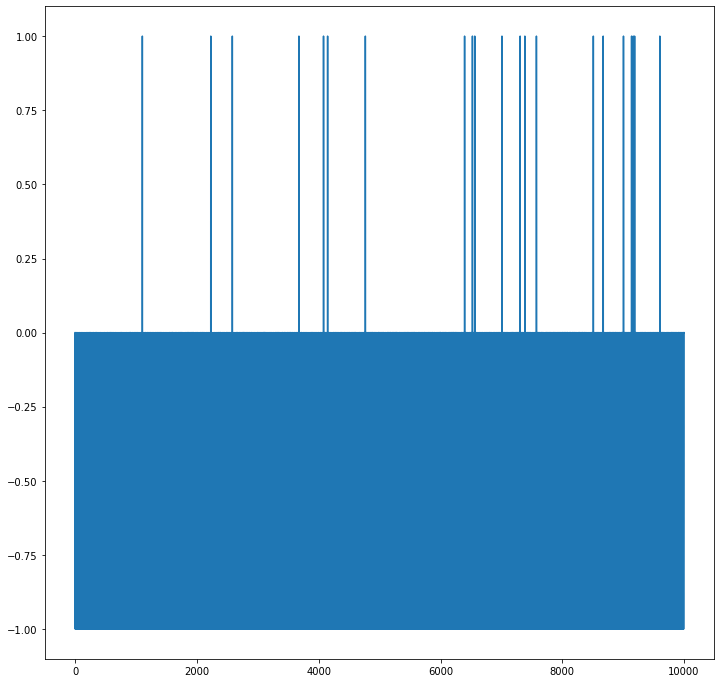

In [0]:
reward_hist = ag.train(env, 10000, 0.1, 0.9999)
print(np.mean(reward_hist))

In [0]:
ag.play(env)


	   |   |  
	 ---------

	   |   |  
	 ---------

	   |   |   


	   |   | X
	 ---------

	   |   |  
	 ---------

	   |   |   


	   |   | X
	 ---------

	   | O |  
	 ---------

	   |   |   


	   |   | X
	 ---------

	   | O |  
	 ---------

	 X |   |   


	 O |   | X
	 ---------

	   | O |  
	 ---------

	 X |   |   


	 O |   | X
	 ---------

	   | O |  
	 ---------

	 X |   | X 


	 O |   | X
	 ---------

	   | O | O
	 ---------

	 X |   | X 


	 O |   | X
	 ---------

	   | O | O
	 ---------

	 X | X | X 

X won!

No, no! It cannot be! Somehow you tricked me, human. 
But never again! I, the computer, so swear it!


In [0]:
env.main()


        Welcome to the greatest intellectual challenge of all time: Tic-Tac-Toe
        This will be a showdown between your human brain and my silicon processor.
        You will make your move known by entering a number, 0 - 8. The number
        will corresponde to the board position as illustrated:
                        0 | 1 | 2
                        ---------
                        3 | 4 | 5
                        ---------
                        6 | 7 | 8
        Prepare yourself, human. The ultimate battle is about to begin. 

        


KeyboardInterrupt: ignored